# Machine Learning Visualizations with Yellowbrick
An open-source python toolkit to accelerate your Model Selection with visual analysis and diagnostic tools.

[Source](https://medium.com/data-science-community-srm/machine-learning-visualizations-with-yellowbrick-3c533955b1b3)

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [1]:
%load_ext watermark

In [31]:
import numpy as np
from yellowbrick.datasets import load_credit, load_game, load_concrete, load_energy
from sklearn.datasets import make_blobs
from yellowbrick.features import Rank1D, Rank2D
from yellowbrick.target import ClassBalance
from sklearn.model_selection import train_test_split
from yellowbrick.model_selection import ValidationCurve
from sklearn.linear_model import Lasso, LogisticRegression
from yellowbrick.regressor import PredictionError
from yellowbrick.classifier import confusion_matrix
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.tree import DecisionTreeRegressor

In [12]:
import matplotlib.pyplot as plt
# Algumas configurações para o matplotlib.
%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(12, 8)


In [14]:
# Run this cell before close.
%watermark -d --iversion -b -r -g -m -v -p yellowbrick

pandas 1.0.5
2020-07-16 

CPython 3.7.7
IPython 7.15.0

yellowbrick 1.1

compiler   : GCC 8.3.0
system     : Linux
release    : 4.19.76-linuxkit
machine    : x86_64
processor  : 
CPU cores  : 16
interpreter: 64bit
Git hash   : c367b07b6166d958dd873f4e17634fef5c414db0
Git repo   : https://github.com/ysraell/examples.git
Git branch : master


/usr/local/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


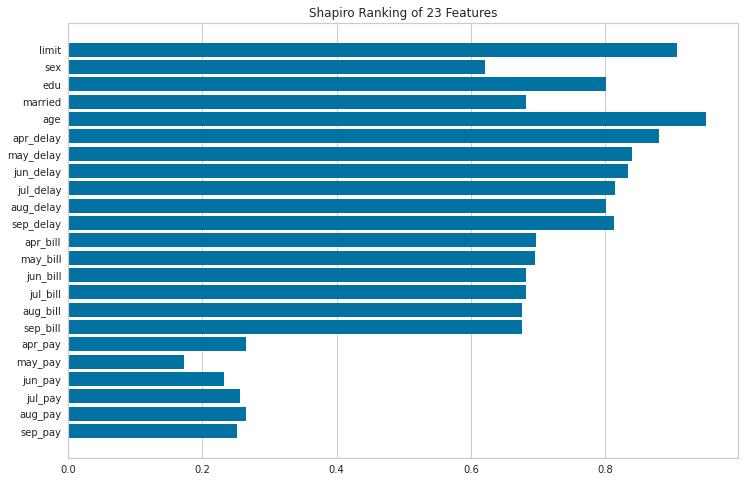

In [15]:
# Load the credit dataset
X, y = load_credit()

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure
# Note: I have used the yellowbrick's pre-loaded datasets to implement all the visualizers.

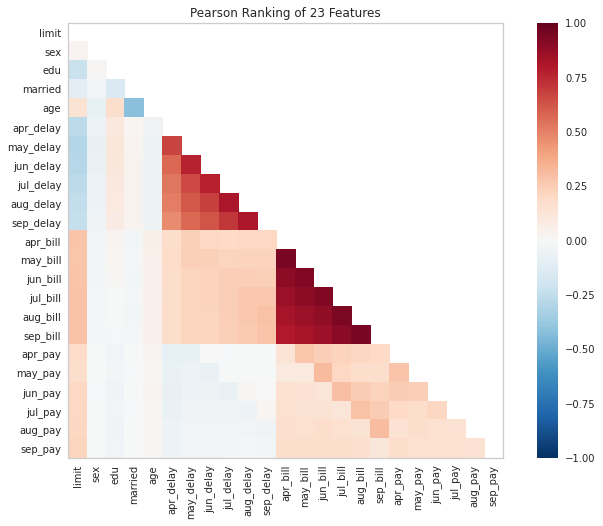

In [16]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure
# Note: I have used the yellowbrick's pre-loaded datasets to implement all the visualizers.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


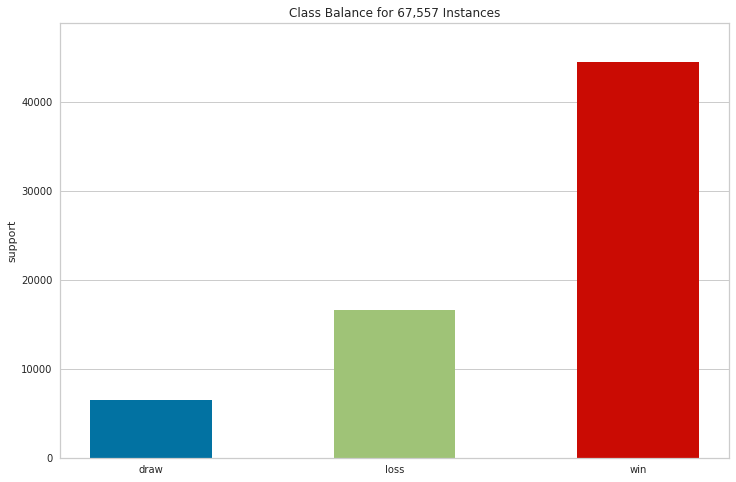

In [19]:
# Load the classification dataset
X, y = load_game()

# Instantiate the visualizer
visualizer = ClassBalance(labels=["draw", "loss", "win"])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

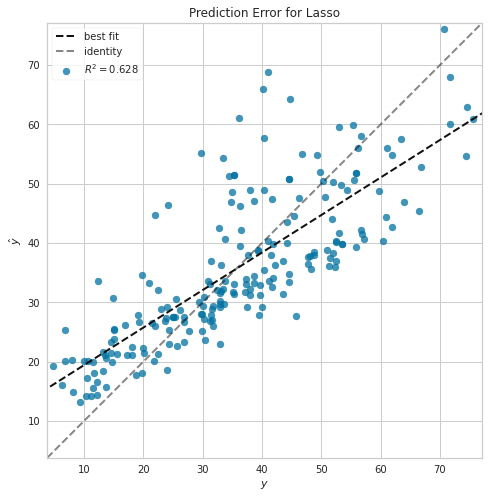

In [21]:
# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)         # Fit the training data 
visualizer.score(X_test, y_test)         # Evaluate the model 
visualizer.show()   

/usr/local/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


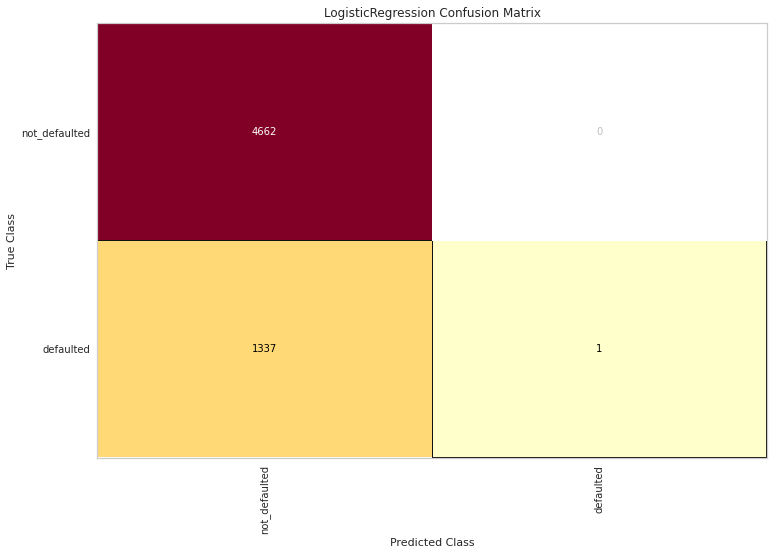

<Figure size 864x576 with 0 Axes>

In [26]:
#Load the classification dataset
X, y = load_credit()

#Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the visualizer with the classification model
confusion_matrix(
    LogisticRegression(),
    X_train, y_train, X_test, y_test,
    classes=['not_defaulted', 'defaulted']
)
plt.tight_layout()

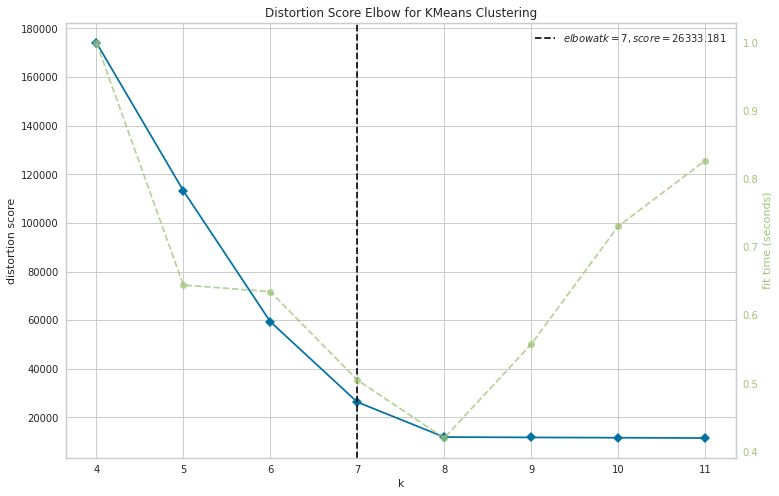

In [29]:
# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


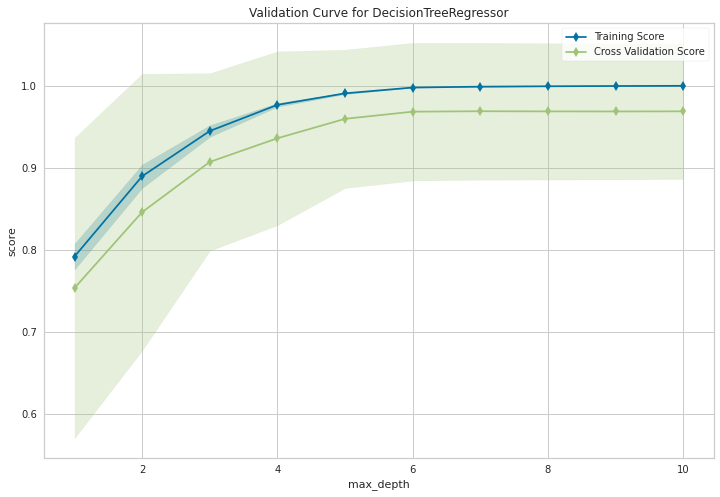

In [32]:
# Load a regression dataset
X, y = load_energy()

viz = ValidationCurve(
    DecisionTreeRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

In [35]:
# Load the text data
corpus = load_hobbies()

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus.data)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: heating load, Length: 768, dtype: float64